In [9]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [10]:
# This is the default size of VGG16 model so,we re-size all the images to this
image_size = [224, 224, 3]

# Download the trained model
vgg = VGG16(input_shape=image_size, weights='imagenet', include_top=False)
# Include top = false means we drop the last layer of this model

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

vgg.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [12]:
# Create a folder and create sub folder with all different classes
#datasets/
#datasets/1 
#--------1.jpg
#--------2.jpg
#--------3.jpg
#datasets/2 
#--------1.jpg

folders = glob("datasets/1/*")
folders[0]

'datasets/1\\1.JPG'

(1899, 1748, 3)


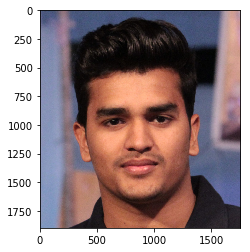

In [13]:
im = plt.imread(folders[0])
print(im.shape)
plt.imshow(im)
plt.show()

In [15]:
# Flatten the last layer
x = Flatten()(vgg.output) 
x  # similar with x = Dense(1000, activation='relu')(x) 

<tf.Tensor 'flatten/Reshape:0' shape=(?, 25088) dtype=float32>

In [16]:
# Add new last layer with sigmoid function
predict = Dense(1, activation='sigmoid')(x) # creating output layer with 1 neuron 

In [17]:
# create a model object
model = Model(inputs=vgg.input, outputs=predict)

# View summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('Datasets',
                                                 target_size=(224, 224),
                                                 class_mode = 'binary')  # categorical

test_datagen = ImageDataGenerator(rescale = 1./255)

Found 4 images belonging to 2 classes.


In [20]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data = None,
  epochs=5,
  steps_per_epoch = len(training_set),
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0541 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.0245 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.0086 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.0231 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.0212 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.0072 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.0403 - acc: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 0.0075 - acc: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 0.0110 - acc: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 0.0096 - acc: 1.0000


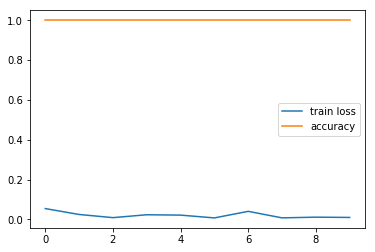

<Figure size 432x288 with 0 Axes>

In [21]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['acc'], label='accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [22]:
model.save('facefeatures_new_model.h5')

In [23]:
img_path = 'datasets/1/1.JPG'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#features = model.predict(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


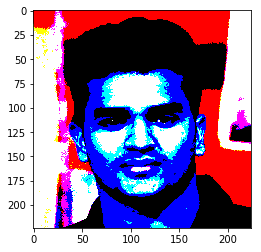

In [24]:
plt.imshow(x[0])
plt.show()

In [29]:
round(model.predict(x)[0][0]) # predicted as 0 

0.0

In [31]:
img_path = 'datasets/2/4.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#features = model.predict(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


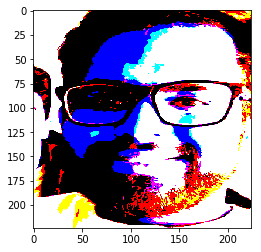

In [32]:
plt.imshow(x[0])
plt.show()

In [35]:
round(model.predict(x)[0][0]) # predicted as 1 

1.0